# CNN for Fashion_mnist dataset

In [5]:
!pip install -q tensorflow-gpu==2.0.0-betal
import tensorflow as tf
print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-betal (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0rc0, 1.15.0rc1, 1.15.0rc2, 1.15.0rc3, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0a0, 2.0.0b0, 2.0.0b1, 2.0.0rc0, 2.0.0rc1, 2.0.0rc2, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0rc0, 2.1.0rc1, 2.1.0rc2, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-betal
2.6.0


Importing necessary libraries 

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model

classical Fashion mnist_dataset 

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train,x_test = x_train / 255.0, x_test / 255.0
print("x_train shape:",x_train.shape)


4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)


In [11]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [12]:
K = len(set(y_train))
print("number of classes:",K)

number of classes: 10


Model building 

In [14]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),strides = 2,activation="relu")(i)
x = Conv2D(64,(3,3),strides = 2,activation="relu")(x)
x = Conv2D(128,(3,3),strides = 2,activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

model = Model(i,x)

Compile and fit 

In [15]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5194 - accuracy: 0.8085 - val_loss: 0.3962 - val_accuracy: 0.8551
Epoch 2/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3573 - accuracy: 0.8671 - val_loss: 0.3371 - val_accuracy: 0.8733
Epoch 3/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3077 - accuracy: 0.8845 - val_loss: 0.3337 - val_accuracy: 0.8771
Epoch 4/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2745 - accuracy: 0.8973 - val_loss: 0.2999 - val_accuracy: 0.8893
Epoch 5/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2509 - accuracy: 0.9054 - val_loss: 0.3031 - val_accuracy: 0.8935
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2300 - accuracy: 0.9120 - val_loss: 0.2991 - val_accuracy: 0.8956
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2113 - accuracy: 0.9195 - val_loss: 0.2954 -

Loss per iteration

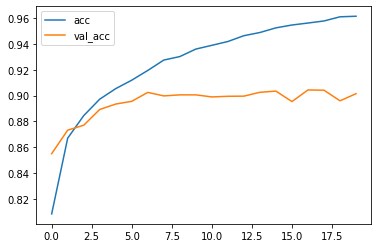

In [16]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()